## CHAPTER 9
---
# APPLYING MATHEMATICAL COMPUTATIONS TO FEATURES

---
- New features can be created by combining two or more variables. 
- Variables can be combined automatically or by using domain knowledge of the data and the industry. 
    - For example, in finance, we combine information about the income and the acquired debt to determine the disposable income: 
        *disposable_income = income - total_debt*
    - Similarly, if a client has debt across many financial products, for example, a car loan, a mortgage, and credit cards, we can determine the total debt by adding all of those variables up: *Total debt = car loan balance + credit card balance + mortgage balance*
- In the previous examples, the mathematical functions used to combine the existing variables are derived via domain knowledge of the industry. 
- We can also combine variables automatically, by creating polynomial combinations of the existing variables in the dataset or by using off-the-shelf algorithms such as decision trees and Principal Component Analysis (PCA). 
- In this chapter, we will create new features using multiple mathematical functions and off-the-shelf algorithms with Python

## 9.1 Combining multiple features with statistical operations

- New features can be created by performing mathematical and statistical operations over existing variables. 
- We can, in principle, use any mathematical or statistical operation to create new features, such as product, mean, standard deviation, or maximum or minimum values, to name a few. 
- In this section, we will implement these mathematical operations using Pandas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer

In [2]:
# load the breast cancer dataset 
data = load_breast_cancer()

# print description of dataset
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
# create a dataframe with the independent variables
df = pd.DataFrame(data.data, columns=data.feature_names)

# add the target
df['target'] = data.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
# make a list of the features we want to engineer
features = ['mean smoothness', 'mean compactness', 'mean concavity',
            'mean concave points', 'mean symmetry']

df[features].head()

,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry
0,0.11840,0.27760,0.3001,0.14710,0.2419
1,0.08474,0.07864,0.0869,0.07017,0.1812
2,0.10960,0.15990,0.1974,0.12790,0.2069
3,0.14250,0.28390,0.2414,0.10520,0.2597
4,0.10030,0.13280,0.1980,0.10430,0.1809


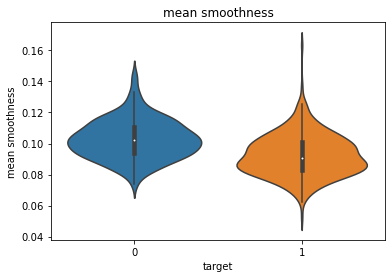

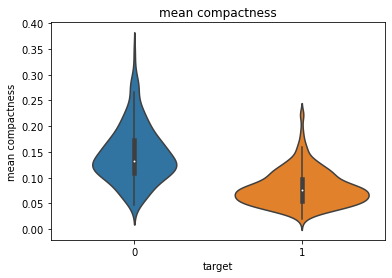

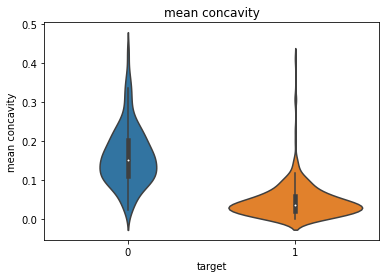

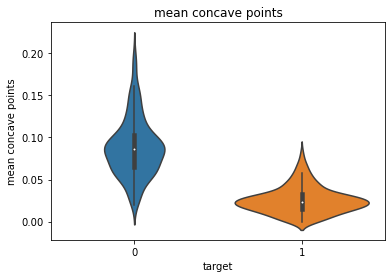

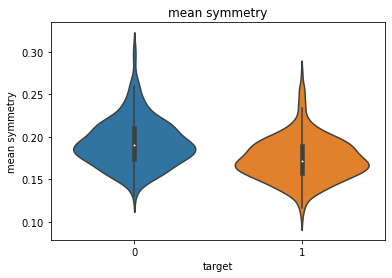

In [5]:
# make violin plots with the distribution of each feature 
for f in features:
    sns.violinplot(x="target", y=f, data=df)
    plt.title(f)
    plt.show()

#### Addition

In [6]:
# add the features
df['added_features'] = df[features].sum(axis=1)
df['added_features'].head()

0    1.08510
1    0.50165
2    0.80170
3    1.03270
4    0.71630
Name: added_features, dtype: float64

Text(0.5, 1.0, 'Added Features')

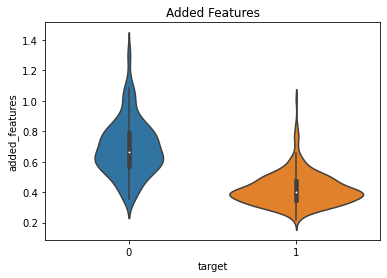

In [7]:
# violin plot with added features
sns.violinplot(x="target", y="added_features", data=df)
plt.title('Added Features')

#### Product

In [8]:
# multiply the features
df['prod_features'] = df[features].prod(axis=1)
df['prod_features'].head()

0    0.000351
1    0.000007
2    0.000092
3    0.000267
4    0.000050
Name: prod_features, dtype: float64

Text(0.5, 1.0, 'Product of Features')

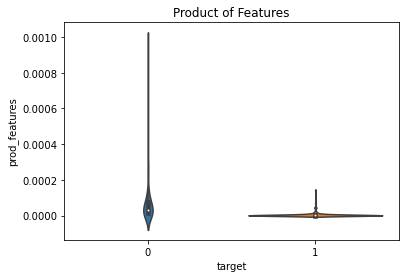

In [9]:
# violin plot with product of features
sns.violinplot(x="target", y="prod_features", data=df)
plt.title('Product of Features')

#### Average

In [10]:
# mean of features
df['mean_features'] = df[features].mean(axis=1)
df['mean_features'].head()

0    0.21702
1    0.10033
2    0.16034
3    0.20654
4    0.14326
Name: mean_features, dtype: float64

Text(0.5, 1.0, 'Mean of Features')

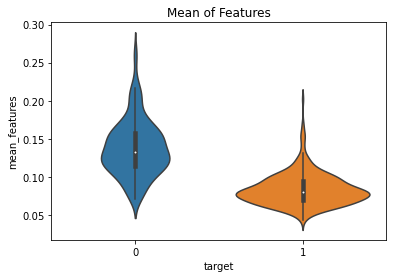

In [11]:
# violin plot with mean of features
sns.violinplot(x="target", y="mean_features", data=df)
plt.title('Mean of Features')

#### Standard deviation

In [12]:
# standard deviation of features
df['std_features'] = df[features].std(axis=1)
df['std_features'].head()

0    0.080321
1    0.045671
2    0.042333
3    0.078097
4    0.044402
Name: std_features, dtype: float64

Text(0.5, 1.0, 'Standard Deviation of Features')

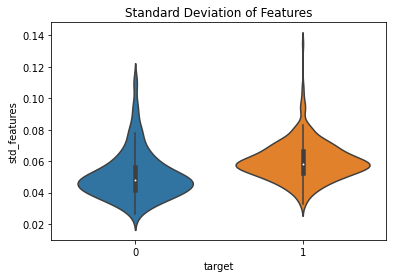

In [13]:
# violin plot with std of features
sns.violinplot(x="target", y="std_features", data=df)
plt.title('Standard Deviation of Features')

#### Maximum

In [14]:
# maximum of features
df['max_features'] = df[features].max(axis=1)
df['max_features'].head()

0    0.3001
1    0.1812
2    0.2069
3    0.2839
4    0.1980
Name: max_features, dtype: float64

Text(0.5, 1.0, 'Maximum of Features')

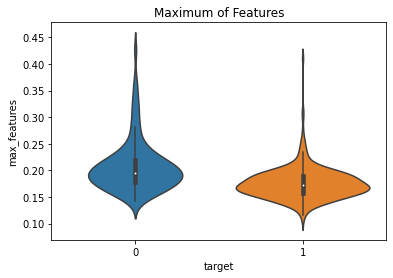

In [15]:
# violin plot with max of features
sns.violinplot(x="target", y="max_features", data=df)
plt.title('Maximum of Features')

#### Minimum

In [16]:
# minimum of the features
df['min_features'] = df[features].min(axis=1)
df['min_features'].head()

0    0.11840
1    0.07017
2    0.10960
3    0.10520
4    0.10030
Name: min_features, dtype: float64

Text(0.5, 1.0, 'Minimum of Features')

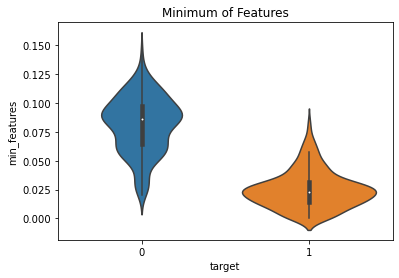

In [17]:
# violin plot with min of features
sns.violinplot(x="target", y="min_features", data=df)
plt.title('Minimum of Features')

In [18]:
# Perform all the operations in one line
df_t = df[features].agg(['sum', 'prod','mean','std', 'max', 'min'], axis='columns')
df_t.head()

,sum,prod,mean,std,max,min
0,1.08510,0.000351,0.21702,0.080321,0.3001,0.11840
1,0.50165,0.000007,0.10033,0.045671,0.1812,0.07017
2,0.80170,0.000092,0.16034,0.042333,0.2069,0.10960
3,1.03270,0.000267,0.20654,0.078097,0.2839,0.10520
4,0.71630,0.000050,0.14326,0.044402,0.1980,0.10030


## 9.2 Combining pairs of features with mathematical functions

- In the previous recipe we created new features by performing statistical operations across several variables. 
- Some mathematical operations, however, such as subtraction or division, make more sense when performed between two features, or when considering multiple features against one reference variable.
- In this recipe, we will learn how to derive new features by subtraction or division utilizing Pandas, and more generally, we will learn how to perform operations against one reference variable.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer

In [20]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


#### Difference

In [21]:
# between 2 features - method 1
df['difference'] = df['worst compactness'].sub(df['mean compactness'])

df['difference'].head()

0    0.38800
1    0.10796
2    0.26460
3    0.58240
4    0.07220
Name: difference, dtype: float64

In [22]:
# between 2 features - method 2
df['difference'] = df['worst compactness'] - (df['mean compactness'])
df['difference'].head()

0    0.38800
1    0.10796
2    0.26460
3    0.58240
4    0.07220
Name: difference, dtype: float64

Text(0.5, 1.0, 'Added Features')

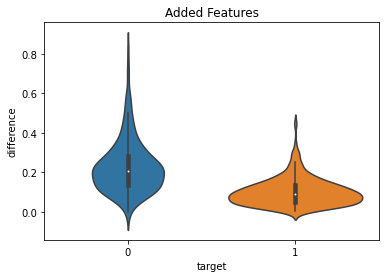

In [23]:
# violin plot of the substraction
sns.violinplot(x="target", y="difference", data=df)
plt.title('Added Features')

#### Quotient

In [24]:
# quotient of features - method 1 
df['quotient'] = df['worst radius'].div(df['mean radius'])
df['quotient'].head()

0    1.410784
1    1.214876
2    1.197054
3    1.305604
4    1.110892
Name: quotient, dtype: float64

In [25]:
# Quotient of features - method 2
df['quotient'] = df['worst radius'] / (df['mean radius'])
df['quotient'].head()

0    1.410784
1    1.214876
2    1.197054
3    1.305604
4    1.110892
Name: quotient, dtype: float64

Text(0.5, 1.0, 'Quotient of Features')

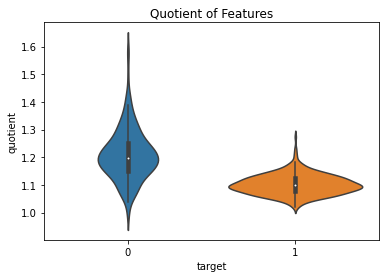

In [26]:
# violin plot with quotient
sns.violinplot(x="target", y="quotient", data=df)
plt.title('Quotient of Features')

#### Aggregation

In [27]:
# features of interest
features = ['mean smoothness', 'mean compactness', 'mean concavity',
               'mean concave points', 'mean symmetry']

# features to aggregate
worst_f = ['worst smoothness', 'worst compactness', 'worst concavity',
               'worst concave points', 'worst symmetry']

# create new feature by sum of the worst features
df['worst'] = df[worst_f].sum(axis=1)

df['worst'].head()

0    2.2652
1    1.0130
2    1.6236
3    2.6843
4    1.1413
Name: worst, dtype: float64

In [28]:
df[features].head()

,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry
0,0.11840,0.27760,0.3001,0.14710,0.2419
1,0.08474,0.07864,0.0869,0.07017,0.1812
2,0.10960,0.15990,0.1974,0.12790,0.2069
3,0.14250,0.28390,0.2414,0.10520,0.2597
4,0.10030,0.13280,0.1980,0.10430,0.1809


In [29]:
df[features+['worst']].head()

,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,worst
0,0.11840,0.27760,0.3001,0.14710,0.2419,2.2652
1,0.08474,0.07864,0.0869,0.07017,0.1812,1.0130
2,0.10960,0.15990,0.1974,0.12790,0.2069,1.6236
3,0.14250,0.28390,0.2414,0.10520,0.2597,2.6843
4,0.10030,0.13280,0.1980,0.10430,0.1809,1.1413


#### Ratio

In [30]:
# ratio = mutliple features / the worst feature 
df[features] = df[features].div(df['worst'], axis=0)

df[features].head()

,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry
0,0.052269,0.122550,0.132483,0.064939,0.106790
1,0.083653,0.077631,0.085785,0.069269,0.178875
2,0.067504,0.098485,0.121582,0.078776,0.127433
3,0.053086,0.105763,0.089930,0.039191,0.096748
4,0.087882,0.116359,0.173486,0.091387,0.158503


## 9.3 Performing polynomial expansion

- A combination of one feature with itself, that is, a polynomial combination of the same feature, can be quite informative or increase the predictive power of our algorithms
- Polynomial combinations of the same or different variables can return new variables that convey additional information and capture feature interaction and can, therefore, be better inputs for our machine learning algorithms, particularly for linear models. 
- We can create polynomial variables automatically using scikit-learn, and, in this section, we will learn how to do so.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [32]:
boston_dataset = load_boston()
data = pd.DataFrame(boston_dataset.data,
                    columns=boston_dataset.feature_names)
data['MEDV'] = boston_dataset.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((354, 13), (152, 13))

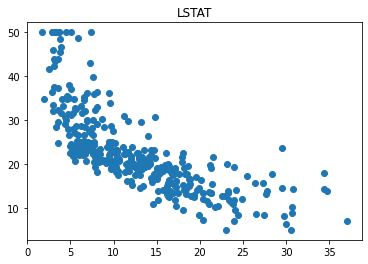

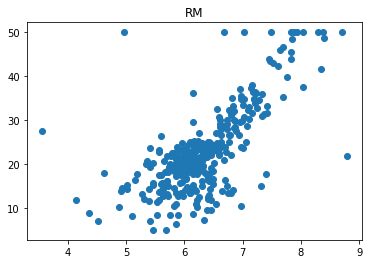

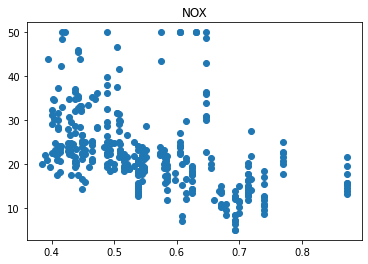

In [34]:
# plot relation of features of interest with the target
for f in ['LSTAT', 'RM', 'NOX']:
    plt.scatter(X_train[f], y_train)
    plt.title(f)
    plt.show()

In [35]:
# set up the polynomial expansion transformer
poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)

# train the polynomial expansion transformer
poly.fit(X_train[['LSTAT', 'RM', 'NOX']])

PolynomialFeatures(degree=3, include_bias=False)

In [36]:
# create the new features
train_t = poly.transform(X_train[['LSTAT', 'RM', 'NOX']])
test_t = poly.transform(X_test[['LSTAT', 'RM', 'NOX']])

# see the name of the created features
poly.get_feature_names(['LSTAT', 'RM', 'NOX'])

['LSTAT',
 'RM',
 'NOX',
 'LSTAT^2',
 'LSTAT RM',
 'LSTAT NOX',
 'RM^2',
 'RM NOX',
 'NOX^2',
 'LSTAT^3',
 'LSTAT^2 RM',
 'LSTAT^2 NOX',
 'LSTAT RM^2',
 'LSTAT RM NOX',
 'LSTAT NOX^2',
 'RM^3',
 'RM^2 NOX',
 'RM NOX^2',
 'NOX^3']

In [37]:
len(poly.get_feature_names(['LSTAT', 'RM', 'NOX']))

19

In [38]:
# capture the returned features in a dataframe
test_t = pd.DataFrame(test_t)

# add column names of created features
test_t.columns = poly.get_feature_names(['LSTAT', 'RM', 'NOX'])

test_t.head()

,LSTAT,RM,NOX,LSTAT^2,LSTAT RM,LSTAT NOX,RM^2,RM NOX,NOX^2,LSTAT^3,LSTAT^2 RM,LSTAT^2 NOX,LSTAT RM^2,LSTAT RM NOX,LSTAT NOX^2,RM^3,RM^2 NOX,RM NOX^2,NOX^3
0,7.34,6.333,0.460,53.8756,46.48422,3.37640,40.106889,2.913180,0.211600,395.446904,341.194175,24.782776,294.384565,21.382741,1.553144,253.996928,18.449169,1.340063,0.097336
1,9.53,6.216,0.631,90.8209,59.23848,6.01343,38.638656,3.922296,0.398161,865.523177,564.542714,57.307988,368.226392,37.379481,3.794474,240.177886,24.380992,2.474969,0.251240
2,10.50,6.373,0.550,110.2500,66.91650,5.77500,40.615129,3.505150,0.302500,1157.625000,702.623250,60.637500,426.458855,36.804075,3.176250,258.840217,22.338321,1.927833,0.166375
3,19.77,5.349,0.693,390.8529,105.74973,13.70061,28.611801,3.706857,0.480249,7727.161833,2090.672162,270.861060,565.655306,73.284563,9.494523,153.044524,19.827978,2.568852,0.332813
4,12.34,6.232,0.437,152.2756,76.90288,5.39258,38.837824,2.723384,0.190969,1879.080904,948.981539,66.544437,479.258748,33.606559,2.356557,242.037319,16.972129,1.190119,0.083453


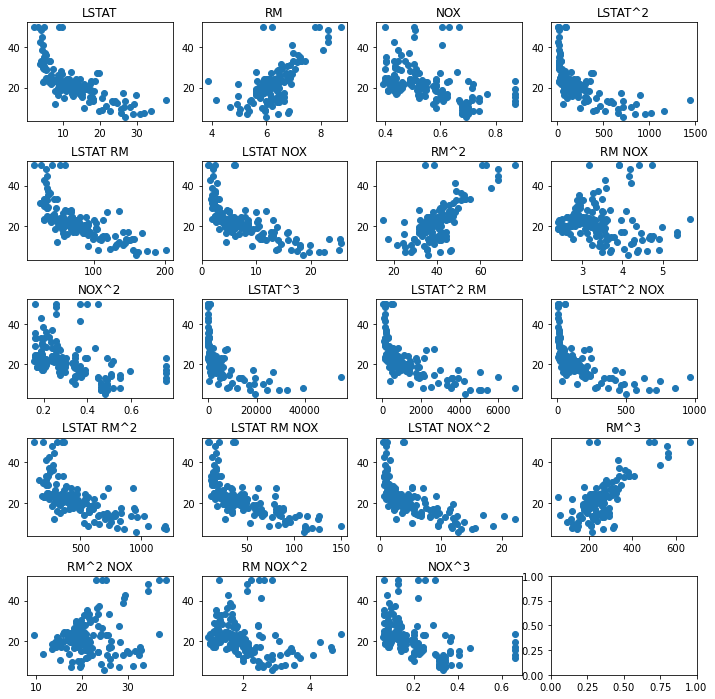

In [39]:
# plot the new features vs the target
# https://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots-in-matplotlib

def plot_features(df):
    # function plots 19 images
    nb_rows = 5
    nb_cols = 4
    
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(12, 12))
    plt.subplots_adjust(wspace=None, hspace=0.4)

    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            if n!=19:
                axs[i, j].scatter(test_t[test_t.columns[n]], y_test)
                axs[i, j].set_title(test_t.columns[n])
                n += 1
    plt.show()
    
plot_features(test_t)

## 9.4 Deriving new features with decision trees

- In the winning solution of the KDD competition in 2009, the authors created new features by combining two or more variables using decision trees and then used those variables to train the winning predictive model. 
- This technique is particularly useful to derive features that are monotonic with the target, which is convenient for linear models. 
- The procedure consists of building a decision tree using a subset of the features, typically two or three at a time, and then using the prediction of the tree as a new feature.
- Creating new features with decision trees not only creates monotonic relationships between features and target, but it also captures feature interactions, which is useful when building models that do not do so automatically, such as linear models.
- In this section, we will learn how to create new features with decision trees using pandas and scikit-learn.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

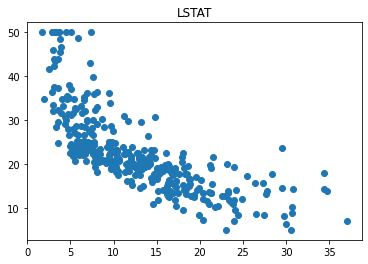

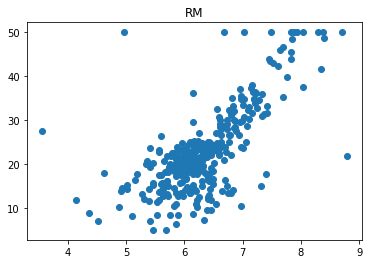

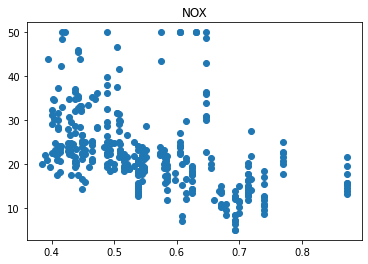

In [41]:
data = pd.DataFrame(boston_dataset.data,
                    columns=boston_dataset.feature_names)
data['MEDV'] = boston_dataset.target

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

for f in ['LSTAT', 'RM', 'NOX']:
    plt.scatter(X_train[f], y_train)
    plt.title(f)
    plt.show()

In [42]:
# set up the grid with parameters to test
param_grid = {'max_depth': [3,4,None]}

# set up the tree within a grid search
tree_model = GridSearchCV(DecisionTreeRegressor(random_state=0),
                          cv = 5, 
                          scoring = 'neg_mean_squared_error',
                          param_grid = param_grid)

# train the decision tree
tree_model.fit(X_train[['LSTAT', 'RM', 'NOX']], y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [3, 4, None]},
             scoring='neg_mean_squared_error')

Text(0.5, 1.0, 'Tree derived feature vs House Price')

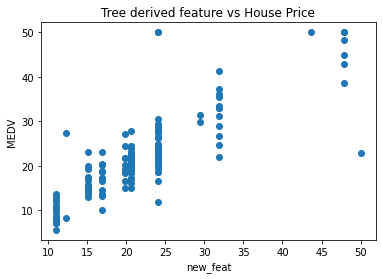

In [43]:
# create the new feature
X_train['new_feat'] = tree_model.predict(X_train[['LSTAT', 'RM', 'NOX']])
X_test['new_feat'] = tree_model.predict(X_test[['LSTAT', 'RM', 'NOX']])

# plot the new feature
plt.scatter(X_test['new_feat'], y_test)
plt.ylabel('MEDV')
plt.xlabel('new_feat')
plt.title('Tree derived feature vs House Price')

## 9.5 Carrying out PCA

- *Principal component analysis (PCA)* is a dimensionality reduction technique used to reduce a high dimensional dataset into a smaller subset of Principal Components (PC), which explain most of the variability observed in the original data. 
- The first PC of the data is a vector along which the observations vary the most, or in other words, a linear combination of the variables in the dataset that maximizes the variance. 
    - Mathematically, the first PC minimizes the sum of the squared distances between each observation and the PC. 
    - The second PC is again a linear combination of the original variables, which captures the largest remaining variance and is subject to the constraint that is perpendicular to the first PC.
- In general, we can build as many PCs as variables in the dataset. 
- Each PC is a linear combination of the variables, orthogonal to the other components, and maximizes the remaining variance, which is left unexplained by previous PCs. 
- The way these PCs are built means that it is often possible for a few of the first PCs to capture most of the information of the original data, as well as most of its relationships to the target.
- In this section, we will implement PCA to reduce the dimensions of our data and create new features, the principal components, using scikit-learn.

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

Text(0, 0.5, 'Percentage of Variance Explained')

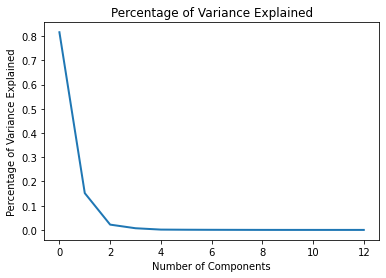

In [45]:
boston_dataset = load_boston()
data = pd.DataFrame(boston_dataset.data,
                    columns=boston_dataset.feature_names)
data['MEDV'] = boston_dataset.target

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

# set up the PCA
pca = PCA(n_components=None)

# train the PCA
pca.fit(X_train)

# create the PCs
train_t = pca.transform(X_train)
test_t = pca.transform(X_test)

# determine the number of informative components
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.title('Percentage of Variance Explained')
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Variance Explained')

- **The number of informative components** is determined by the change in the decay in the percentage of variance explained by each component. 
- In the plot above, we can see that *the first two components capture most of the variability of the data*, meaning that we can use them to train our machine learning models using a linear model. 
- PCA is sensitive to the scale of the features; therefore, it is advisable, if not compulsory to have features within a similar scale before fitting the PCA object from scikit-learn.